<a href="https://colab.research.google.com/github/amogh9594/2018miniproject/blob/master/Tensorflow_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

In [ ]:
t = np.arange(0,1500)
x = np.sin(0.02*t) + np.random.uniform(low=-1 , high=1, size=(1500,))

In [ ]:
print(t)

[   0    1    2 ... 1497 1498 1499]


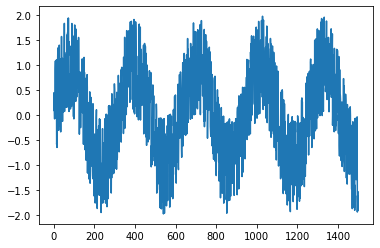

In [ ]:
plt.plot(x)

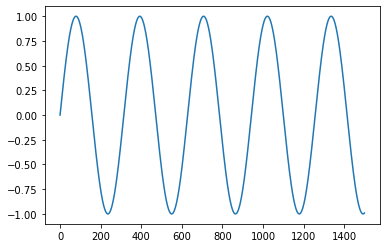

In [ ]:
x_without_noise = np.sin(0.02*t)
plt.plot(x_without_noise)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
normalizer = MinMaxScaler(feature_range=(0, 1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
print(x)


[[0.52386503]
 [0.61300136]
 [0.56123505]
 ...
 [0.05168172]
 [0.01689184]
 [0.11120688]]


In [ ]:
train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


In [ ]:
def createDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step): 
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)
 
step = 10
trainX,trainY = createDataset(train,step)
testX,testY = createDataset(test,step)
print(trainX[0])

[[0.52386503]
 [0.61300136]
 [0.56123505]
 [0.537031  ]
 [0.48080605]
 [0.5981544 ]
 [0.49790361]
 [0.73245066]
 [0.7737792 ]
 [0.48552839]]


In [ ]:
print(trainY[0])

[0.69682909]


In [ ]:
print(trainX.shape)

(990, 10, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=1, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
history = model.fit(trainX,trainY, epochs=500, batch_size=16,verbose=2)

Epoch 1/500
62/62 - 0s - loss: 0.0561
Epoch 2/500
62/62 - 0s - loss: 0.0349
Epoch 3/500
62/62 - 0s - loss: 0.0322
Epoch 4/500
62/62 - 0s - loss: 0.0313
Epoch 5/500
62/62 - 0s - loss: 0.0309
Epoch 6/500
62/62 - 0s - loss: 0.0307
Epoch 7/500
62/62 - 0s - loss: 0.0305
Epoch 8/500
62/62 - 0s - loss: 0.0304
Epoch 9/500
62/62 - 0s - loss: 0.0303
Epoch 10/500
62/62 - 0s - loss: 0.0302
Epoch 11/500
62/62 - 0s - loss: 0.0301
Epoch 12/500
62/62 - 0s - loss: 0.0300
Epoch 13/500
62/62 - 0s - loss: 0.0299
Epoch 14/500
62/62 - 0s - loss: 0.0299
Epoch 15/500
62/62 - 0s - loss: 0.0297
Epoch 16/500
62/62 - 0s - loss: 0.0297
Epoch 17/500
62/62 - 0s - loss: 0.0296
Epoch 18/500
62/62 - 0s - loss: 0.0295
Epoch 19/500
62/62 - 0s - loss: 0.0295
Epoch 20/500
62/62 - 0s - loss: 0.0294
Epoch 21/500
62/62 - 0s - loss: 0.0293
Epoch 22/500
62/62 - 0s - loss: 0.0292
Epoch 23/500
62/62 - 0s - loss: 0.0291
Epoch 24/500
62/62 - 0s - loss: 0.0291
Epoch 25/500
62/62 - 0s - loss: 0.0290
Epoch 26/500
62/62 - 0s - loss: 0.

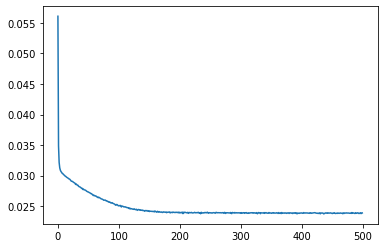

In [ ]:
import matplotlib.pyplot as plt
 
loss = history.history['loss']
 
plt.plot(loss)

In [ ]:
trainPredict = normalizer.inverse_transform(model.predict(trainX))
testPredict= normalizer.inverse_transform(model.predict(testX))
predicted= np.concatenate((trainPredict,testPredict))
x = normalizer.inverse_transform(x)


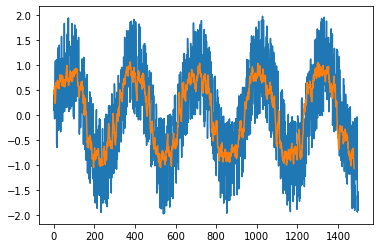

In [ ]:
plt.plot(x)
plt.plot(predicted)
